## Using Jupyter/IPython for Teaching

<p xmlns:dct="http://purl.org/dc/terms/">
  <a rel="license"
     href="http://creativecommons.org/publicdomain/zero/1.0/">
    <img src="http://i.creativecommons.org/p/zero/1.0/88x31.png" style="border-style: none;" alt="CC0" />
  </a>
</p>

This notebook is meant to be a slide show.
If it doesn't look like a slide show, you probably have to install [RISE](https://github.com/damianavila/RISE/):

    git clone https://github.com/damianavila/RISE.git
    cd RISE
    python setup.py install --develop

If you have both Python 2 and 3 installed, you should use `python3` instead of `python`.

After the installation (and after re-starting Jupyter/IPython), you will have a new item in the toolbar which allows you to start the presentation.

### What is Jupyter?

* formerly known as *IPython* ("interactive Python")

* an interactive terminal and a browser-based notebook

* can be used with different programming languages:

  * **Ju**lia (http://julialang.org/)
  
  * **Pyt**hon (https://www.python.org/)
  
  * **R** (http://www.r-project.org/)
  
  * and others ...

### What's so great about the Jupyter notebook?

* mix of text, code and results

* media

  * images, audio, video
  
  * anything a web browser can display

* equations

### One notebook, many uses

* interactive use

* static online HTML pages on http://nbviewer.jupyter.org/

* nbconvert

  * HTML
  
  * $\LaTeX$ $\to$ PDF
  
  * `.py` files
  
  * ...

* slide shows!

### HTML5 `<audio>` tag

<audio src="data/singing.wav" controls>Your browser does not support the audio element.</audio>
![CC BY-SA](data/by-sa.png)[singing.wav](data/singing.wav) by [www.openairlib.net](http://www.openairlib.net/anechoicdb/content/operatic-voice); [CC BY-SA](http://creativecommons.org/licenses/by-sa/3.0/).


### Loading Audio Data in Python

In [4]:
import soundfile as sf
sig, fs = sf.read('data/singing.wav', always_2d=False)

### Plotting

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

In [6]:
import numpy as np

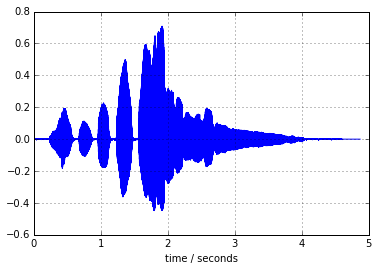

In [7]:
t = np.arange(len(sig)) / fs
plt.plot(t, sig)
plt.xlabel('time / seconds')
plt.grid()

### Spectrogram

Squared magnitude of the Short Time Fourier Transform (STFT)

$$|\text{STFT}\{x[n]\}(m, \omega)|^2 = \left| \sum_{n=-\infty}^\infty x[n]w[n-m] \text{e}^{-j \omega n}\right|^2$$

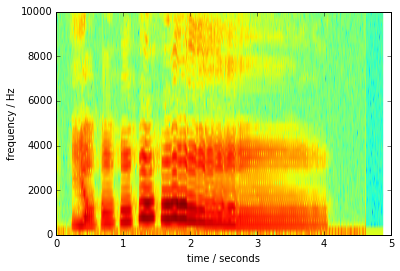

In [8]:
plt.specgram(sig, Fs=fs)
plt.ylabel('frequency / Hz')
plt.xlabel('time / seconds')
plt.ylim(0, 10000);

## Sound Field Synthesis

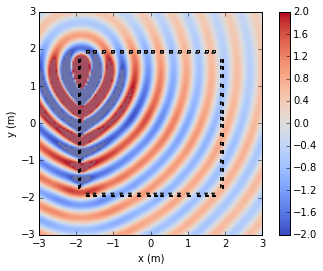

In [21]:
import sfs
xs = [-2.5, 1.5, 0]
f = 500
omega = 2 * np.pi * f
grid = sfs.util.xyz_grid([-3, 3], [-3, 3], 0, spacing=0.05)
x0, n0, a0 = sfs.array.load('data/university_rostock.csv')
d = sfs.mono.drivingfunction.wfs_25d_point(omega, x0, n0, xs)
a = sfs.mono.drivingfunction.source_selection_point(n0, x0, xs)
twin = sfs.tapering.tukey(a, 0.3)
p = sfs.mono.synthesized.generic(omega, x0, n0, d * twin * a0, grid)
sfs.plot.soundfield(p, grid)
sfs.plot.loudspeaker_2d(x0, n0, twin)

## Symbolic Math

In [8]:
%matplotlib inline
import sympy

sympy.init_printing()

t, sigma, omega = sympy.symbols(('t', 'sigma', 'omega'))

sigma = -2
omega = 10
s = sigma + 1j*omega
x = sympy.exp(s*t)
x

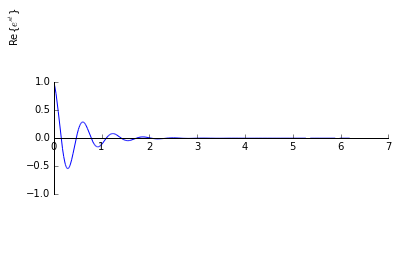

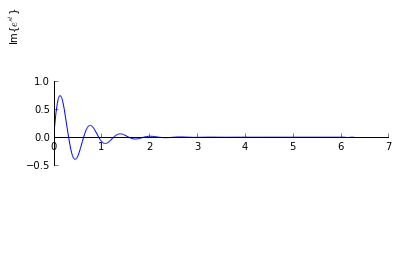

In [7]:
sympy.plotting.plot(sympy.re(x),(t, 0, 2*sympy.pi),ylim=[-2, 2], ylabel='Re{$e^{st}$}')
sympy.plotting.plot(sympy.im(x),(t, 0, 2*sympy.pi),ylim=[-2, 2], ylabel='Im{$e^{st}$}')

## Example notebooks

[exercises for the lecture "communication acoustics"](http://nbviewer.ipython.org/github/spatialaudio/communication-acoustics-exercises/blob/master/index.ipynb)

That's it for now!

<p xmlns:dct="http://purl.org/dc/terms/">
  <a rel="license"
     href="http://creativecommons.org/publicdomain/zero/1.0/">
    <img src="http://i.creativecommons.org/p/zero/1.0/88x31.png" style="border-style: none;" alt="CC0" />
  </a>
  <br />
  To the extent possible under law,
  <span resource="[_:publisher]" rel="dct:publisher">
    <span property="dct:title">Matthias Geier</span></span>
  has waived all copyright and related or neighboring rights to
  this work.
</p>